In [237]:
import io, time, json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
from tensorflow.keras.utils import to_categorical
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [265]:
# Grabbing the nominees
def retrieve_html(url):
    """
    Return the raw HTML at the specified URL.

    Args:
        url (string): 

    Returns:
        result: dict, movie name as key, movie information as value
    """
    # remember to use browser header here, or cannot retrieve full data from the website
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers = headers)
    html = response.content
    soup = BeautifulSoup(html,'lxml')

    result = {}
    for item in soup.find_all('div', {'class':'result-subgroup subgroup-awardcategory-chron'}):
        try:
            award_title = item.find('div',{'class':'result-subgroup-title'}).find('a',{'class':'nominations-link'}).contents[0]
            if award_title == 'ACTRESS IN A LEADING ROLE':
                sub_groups = item.find_all('div',{'class':'result-details awards-result-actingorsimilar'})
                for sub in sub_groups:
                    sub_result = {}
                    film_title = sub.find('div',{'class':'awards-result-film-title'}).find('a',{'class':'nominations-link'}).contents[0]
                    is_winner = 1
                    actor = sub.find('div',{'class':'awards-result-nominationstatement'}).find('a',{'class':'nominations-link'}).contents[0]           
                    character = sub.find('div',{'class':'awards-result-character-name'}).contents[0].strip('{}"')
                    sub_result['film_title'] = film_title
                    sub_result['is_winner'] = is_winner
                    sub_result['actor'] = actor
                    if sub.find('span',{'class':'glyphicon glyphicon-star'}):
                        sub_result['winner'] = 1
                    else:
                        sub_result['winner'] = 0
                    # sub_result['director'] = director
                    result[film_title] = sub_result
        except Exception:
            pass
    return result

In [266]:
# data of year 2016
best_2016 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:89,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2017
best_2017 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:90,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2018
best_2018 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:91,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

In [267]:
best_2018


{'Roma': {'film_title': 'Roma',
  'is_winner': 1,
  'actor': 'Yalitza Aparicio',
  'winner': 0},
 'The Wife': {'film_title': 'The Wife',
  'is_winner': 1,
  'actor': 'Glenn Close',
  'winner': 0},
 'The Favourite': {'film_title': 'The Favourite',
  'is_winner': 1,
  'actor': 'Olivia Colman',
  'winner': 1},
 'A Star Is Born': {'film_title': 'A Star Is Born',
  'is_winner': 1,
  'actor': 'Lady Gaga',
  'winner': 0},
 'Can You Ever Forgive Me?': {'film_title': 'Can You Ever Forgive Me?',
  'is_winner': 1,
  'actor': 'Melissa McCarthy',
  'winner': 0}}

In [268]:
# Load Data
import numpy as np
import pandas as pd
# read from award
df_awards = pd.read_csv('database.csv', skiprows = 1, names=['year','ceremony','award','is_winner','winner','movieName','Nominis'])
df_movies = pd.read_csv('movies.csv')
df_credits = pd.read_csv('credits.csv')
df161718_movies = pd.read_csv('2016_2017_best_actresssupport_tmdb2.csv')


In [269]:
#View data
df_awards.tail()
#print(df_awards.head())
#print("")
#print(df_credits.head())

,year,ceremony,award,is_winner,winner,movieName,Nominis
9959,2015,88,Writing (Original Screenplay),1.0,1.0,Spotlight,Written by Josh Singer & Tom McCarthy
9960,2015,88,Writing (Original Screenplay),NaN,NaN,Straight Outta Compton,Screenplay by Jonathan Herman and Andrea Berlo...
9961,2015,88,Jean Hersholt Humanitarian Award,1.0,1.0,Debbie Reynolds,NaN
9962,2015,88,Honorary Award,1.0,1.0,Spike Lee,NaN
9963,2015,88,Honorary Award,1.0,1.0,Gena Rowlands,NaN


In [272]:
# append the data we scrapped to the df_awards
# append the data we scrapped to the df_awards
data = []
for k,v in best_2016.items():
    row = []
    row.append(['2016', 89, 'Actress in a Leading Role', v['is_winner'],v['winner'], v['film_title'], v['actor']])
    data.append(row[0])
  
for k,v in best_2017.items():
    row = []
    row.append(['2017', 90, 'Actress in a Leading Role', v['is_winner'],v['winner'], v['film_title'], v['actor']])
    data.append(row[0])

for k,v in best_2018.items():
    row = []
    row.append(['2018', 91, 'Actress in a Leading Role', v['is_winner'],v['winner'], v['film_title'], v['actor']])
    data.append(row[0])
# pass the column name to the columns!!! Or there will be a runtime error
df_awards=df_awards.append(pd.DataFrame(data,columns=['year','ceremony','award','is_winner','winner','movieName','Nominis']),ignore_index=True)
df_awards['year']= df_awards['year'].astype(int)
#df_all_awards['winner']= df_all_awards['winner'].astype(int)
df_awards.drop_duplicates(subset=['movieName','year','winner','award'], inplace=True, keep='last')
df_awards[df_awards['award']=='Actress in a Leading Role']


,year,ceremony,award,is_winner,winner,movieName,Nominis
5415,1976,49,Actress in a Leading Role,NaN,NaN,Marie-Christine Barrault,"Cousin, Cousine"
5416,1976,49,Actress in a Leading Role,1.0,1.0,Faye Dunaway,Network
5417,1976,49,Actress in a Leading Role,NaN,NaN,Talia Shire,Rocky
5418,1976,49,Actress in a Leading Role,NaN,NaN,Sissy Spacek,Carrie
5419,1976,49,Actress in a Leading Role,NaN,NaN,Liv Ullmann,Face to Face
5519,1977,50,Actress in a Leading Role,NaN,NaN,Anne Bancroft,The Turning Point
5520,1977,50,Actress in a Leading Role,NaN,NaN,Jane Fonda,Julia
5521,1977,50,Actress in a Leading Role,1.0,1.0,Diane Keaton,Annie Hall
5522,1977,50,Actress in a Leading Role,NaN,NaN,Shirley MacLaine,The Turning Point
5523,1977,50,Actress in a Leading Role,NaN,NaN,Marsha Mason,The Goodbye Girl


In [273]:
# Data Manipulation
#Joining the dataframes
if 'title' in df_credits.columns: 
  df_credits = df_credits.drop('title',axis=1) 
df_credits_movies = df_credits.set_index('movie_id').join(df_movies.set_index('id'))

In [274]:

#df_credits_movies.dtypes
# Reset the data types and get the earliest date of release_date
#Convert released date to date format so we can use it later for our max, min date
df161718_movies['release_date'] = pd.to_datetime(df161718_movies['release_date'], format='%Y-%m-%d')
df_credits_movies = df_credits_movies.append(df161718_movies)
df_credits_movies['release_date'] = pd.to_datetime(df_credits_movies['release_date'], format='%Y-%m-%d')

#get the earliest release date from the dataset
min_year = min(df_credits_movies['release_date']) #1916-09-04
max_year = max(df_credits_movies['release_date']) #2017-02-03
print(min_year)
print(max_year)

1916-09-04 00:00:00
2018-12-25 00:00:00


In [275]:
# Select movies that are in Outstanding Picture or Best Picture awards category -> df_picture_awards
# #join df_credits_movies and df_awards by movie name (df_credits_movies.title = df_awards.movieName)
# #before that, extract BEST PICTRUE from the df_awards
# df_actress_awards = df_awards.loc[df_awards['award'].isin(['Actress','Actress in a Leading Role'])]
# df_actress_awards.reset_index(drop = True, inplace = True)
# df_credits_movies = df_credits_movies.loc[df_credits_movies['status'].isin(['Released'])]
# df_actress_awards
# df_credits_movies

In [276]:
df_credits_movies['released_year'] = df_credits_movies['release_date'].dt.year.fillna(0.0).astype(int)
df_credits_movies

,budget,cast,crew,genres,genres_new,homepage,keywords,movie_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,released_year
19995,237000000,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",NaN,en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
285,300000000,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",NaN,en,Pirates of the Caribbean: At World's End,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
206647,245000000,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",NaN,en,Spectre,...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
49026,250000000,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",NaN,en,The Dark Knight Rises,...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
49529,260000000,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",NaN,en,John Carter,...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012
559,258000000,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",NaN,en,Spider-Man 3,...,2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,2007
38757,260000000,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",NaN,http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",NaN,en,Tangled,...,2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,2010
99861,280000000,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",NaN,en,Avengers: Age of Ultron,...,2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,

In [278]:
# Select movies that are in Outstanding Picture or Best Picture awards category -> df_picture_awards
#join df_credits_movies and df_awards by movie name (df_credits_movies.title = df_awards.movieName)
#before that, extract BEST PICTRUE from the df_awards
df_actress_awards = df_awards.loc[df_awards['award'].isin(['Actress in a Leading Role','Actress'])]
df_actress_awards.reset_index(drop = True, inplace = True)
df_credits_movies = df_credits_movies.loc[df_credits_movies['status'].isin(['Released'])]
df_actress_awards
# df_actress_awards[df_actress_awards['year']=='2016']
# print("--------------")
# print(df_actress_awards.columns)
# print("--------------")
# print(df_credits_movies.columns)

,year,ceremony,award,is_winner,winner,movieName,Nominis
0,1928,1,Actress,NaN,NaN,Louise Dresser,A Ship Comes In
1,1928,1,Actress,1.0,1.0,Janet Gaynor,7th Heaven
2,1928,1,Actress,NaN,NaN,Gloria Swanson,Sadie Thompson
3,1929,2,Actress,NaN,NaN,Ruth Chatterton,Madame X
4,1929,2,Actress,NaN,NaN,Betty Compson,The Barker
5,1929,2,Actress,NaN,NaN,Jeanne Eagels,The Letter
6,1929,2,Actress,NaN,NaN,Corinne Griffith,The Divine Lady
7,1929,2,Actress,NaN,NaN,Bessie Love,The Broadway Melody
8,1929,2,Actress,1.0,1.0,Mary Pickford,Coquette
9,1930,3,Actress,NaN,NaN,Nancy Carroll,The Devil's Holiday


In [279]:
# Replace all the null value in ‘winner’ column with 1
# df_picture_awards['winner'].isnull().sum()
df_actress_awards['is_winner'].fillna(1,inplace = True)
df_actress_awards

,year,ceremony,award,is_winner,winner,movieName,Nominis
0,1928,1,Actress,1.0,NaN,Louise Dresser,A Ship Comes In
1,1928,1,Actress,1.0,1.0,Janet Gaynor,7th Heaven
2,1928,1,Actress,1.0,NaN,Gloria Swanson,Sadie Thompson
3,1929,2,Actress,1.0,NaN,Ruth Chatterton,Madame X
4,1929,2,Actress,1.0,NaN,Betty Compson,The Barker
5,1929,2,Actress,1.0,NaN,Jeanne Eagels,The Letter
6,1929,2,Actress,1.0,NaN,Corinne Griffith,The Divine Lady
7,1929,2,Actress,1.0,NaN,Bessie Love,The Broadway Melody
8,1929,2,Actress,1.0,1.0,Mary Pickford,Coquette
9,1930,3,Actress,1.0,NaN,Nancy Carroll,The Devil's Holiday


In [378]:
# join df_picture_awards with df_credits_movies
#cleaning names/punctuation
import re

# movieName = [re.sub(r'[^\w\s]','',x) for x in df_actress_awards['movieName'].str.lower().str.strip().values]
# title = [re.sub(r'[^\w\s]','',x) for x in df_credits_movies['title'].str.lower().str.strip().values]
Actress = [re.sub(r'[^\w\s]','',x) for x in df_actress_awards['Nominis'].str.lower().str.strip().values]
df_actress_awards.loc[:,'Nominis'] = Actress
#then, change the ACTRESS in the movie to lower case
# df_actress_awards.loc[:,'movie_title'] = movieName #change the string to lower case
# df_credits_movies.loc[:,'movie_title']= title
df_credits_movies['Actress'] = df_credits_movies.cast.str.extract('({})'.format('|'.join(df_actress_awards['Nominis'])), expand=False)
df_credits_movies['Actress'] = df_credits_movies['Actress'].str.lower()
print(df_actress_awards)
# print(df_credits_movies['Actress'])

     year  ceremony                      award  is_winner  winner  \
0    1928         1                    Actress        1.0     NaN   
1    1928         1                    Actress        1.0     1.0   
2    1928         1                    Actress        1.0     NaN   
3    1929         2                    Actress        1.0     NaN   
4    1929         2                    Actress        1.0     NaN   
5    1929         2                    Actress        1.0     NaN   
6    1929         2                    Actress        1.0     NaN   
7    1929         2                    Actress        1.0     NaN   
8    1929         2                    Actress        1.0     1.0   
9    1930         3                    Actress        1.0     NaN   
10   1930         3                    Actress        1.0     NaN   
11   1930         3                    Actress        1.0     NaN   
12   1930         3                    Actress        1.0     1.0   
13   1930         3               

In [396]:
# join the two tables, merge the data
df = df_actress_awards.merge(df_credits_movies, left_on='Actress', right_on='Actress', how='right')
df = df.reset_index(drop=True)
#drop the columns from award table
df.drop('homepage',axis = 1, inplace = True)
df.drop('year',axis = 1, inplace = True)
df.drop('award',axis = 1, inplace = True)
df.drop('movieName',axis = 1, inplace = True)
df.drop('Nominis',axis = 1, inplace = True)
df.drop('ceremony',axis = 1, inplace = True)
df['is_winner'].fillna(0,inplace=True) #fill NA with 0
df['winner'].fillna(0,inplace=True) #fill NA with 0
#df[df['is_winner']==0]
# Print master df to csv
#df.to_csv('masterList.csv', index=False)

In [397]:
df[df['is_winner']==1]

,is_winner,winner,Actress,movie_title_x,budget,cast,crew,genres,genres_new,keywords,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,released_year,movie_title_y
0,1.0,0.0,emma,marie dressler,200000000,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""52fe43b29251416c7501aa63"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,"[{""id"": 627, ""name"": ""killing""}, {""id"": 1568, ...",...,586090727,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"For love, for hate, for justice, for revenge.",Quantum of Solace,6.1,2965,2008,quantum of solace
1,1.0,0.0,emma,marie dressler,380000000,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",...,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,pirates of the caribbean on stranger tides
2,1.0,0.0,emma,marie dressler,200000000,"[{""cast_id"": 7, ""character"": ""Alice Kingsleigh...","[{""credit_id"": ""52fe44c09251416c7503fbc3"", ""de...","[{""id"": 10751, ""name"": ""Family""}, {""id"": 14, ""...",NaN,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",...,1025491110,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You're invited to a very important date.,Alice in Wonderland,6.4,4645,2010,alice in wonderland
3,1.0,0.0,emma,marie dressler,150000000,"[{""cast_id"": 5, ""character"": ""Prince Dastan"", ...","[{""credit_id"": ""567e74d4c3a36860e9008e46"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,"[{""id"": 1241, ""name"": ""persia""}, {""id"": 1965, ...",...,335154643,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Defy the Future,Prince of Persia: The Sands of Time,6.2,2317,2010,prince of persia the sands of time
4,1.0,0.0,emma,marie dressler,176000003,"[{""cast_id"": 6, ""character"": ""Jupiter Jones"", ...","[{""credit_id"": ""5535bb999251414716001979"", ""de...","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,"[{""id"": 306, ""name"": ""jupiter""}, {""id"": 9882, ...",...,183987723,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Expand your universe.,Jupiter Ascending,5.2,2768,2015,jupiter ascending
5,1.0,0.0,emma,marie dressler,125000000,"[{""cast_id"": 27, ""character"": ""Harry Potter"", ...","[{""credit_id"": ""52fe4267c3a36847f801be1d"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,"[{""id"": 616, ""name"": ""witch""}, {""id"": 1441, ""n...",...,976475550,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,7.5,7006,2001,harry potter and the philosophers stone
6,1.0,0.0,emma,marie dressler,125000000,"[{""cast_id"": 1, ""character"": ""Perseus"", ""credi...","[{""credit_id"": ""52fe479f9251416c7509ff1b"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,"[{""id"": 2033, ""name"": ""hades""}, {""id"": 2035, ""...",...,232713139,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Titans will clash.,Clash of the Titans,5.6,2233,2010,clash of the titans
7,1.0,0.0,emma,marie dressler,100000000,"[{""cast_id"": 23, ""character"": ""Harry Potter"", ...","[{""credit_id"": ""52fe4267c3a36847f801bf67"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,"[{""id"": 391, ""name"": ""flying car""}, {""id"": 616...",...,876688482,161.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hogwarts is back in session.,Harry Potter and the Chamber of Secrets,7.4,5815,2002,harry potter and the chamber of secrets
8,1.0,0.0,emma,marie dressler,70000000,"[{""cast_id"": 1, ""character"": ""Ben 'Finn' Finne..."

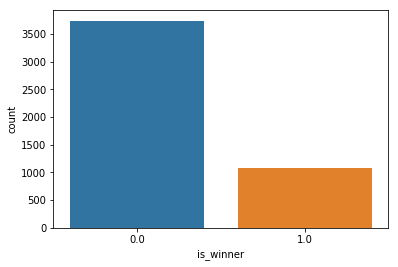

In [398]:
# We will choose the under-sampling by sampling from the 0-labeled data. 
# We need to first get a subset of nominated data, then sample from the non-nominated data, 
# and finally append the sampled data to the subset of nominated data.
sns.countplot(x='is_winner', data = df)


In [399]:
#Get the number of 0 labeled data, and the number of 1 labeled data
print(len(df.loc[df['is_winner'] == 0])) #4586
print(len(df.loc[df['is_winner'] == 1])) #209

3737
1072


In [518]:
#balance the data
df_subset_0 = df.loc[df['is_winner'] == 0]
df_subset_1 = df.loc[df['is_winner'] == 1]

df_subset_0.drop('is_winner',axis=1,inplace=True)
df_subset_1.drop('is_winner',axis=1,inplace=True)

#sample with replacement
df_subset_0 = df_subset_0.sample(100) 
df_subset = pd.concat([df_subset_0,df_subset_1],ignore_index = True)
df_new = df_subset.merge(df_actress_awards, left_on = 'Actress', right_on = 'Actress', how = 'left')
df_new = df_new.fillna(0)
#df_new[df_new['year']==2018]

In [519]:
print(len(df_new))
df_new

1172


,winner_x,Actress,movie_title_x,budget,cast,crew,genres,genres_new,keywords,movie_id,...,released_year,movie_title_y,year,ceremony,award,is_winner,winner_y,movieName,Nominis,movie_title
0,0.0,0,0,32000000,"[{""cast_id"": 1, ""character"": ""Remy"", ""credit_i...","[{""credit_id"": ""52fe44a49251416c91017c3f"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",0,"[{""id"": 4565, ""name"": ""dystopia""}, {""id"": 1173...",0.0,...,2010,repo men,0.0,0.0,0,0.0,0.0,0,0,0
1,0.0,0,0,9000000,"[{""cast_id"": 9, ""character"": ""Logan"", ""credit_...","[{""credit_id"": ""52fe43ba9251416c7501bcf9"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",0,"[{""id"": 293, ""name"": ""female nudity""}, {""id"": ...",0.0,...,1976,logans run,0.0,0.0,0,0.0,0.0,0,0,0
2,0.0,0,0,70000000,"[{""cast_id"": 9, ""character"": ""Anthony 'Hub' Hu...","[{""credit_id"": ""52fe4540c3a36847f80c3af5"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",0,"[{""id"": 187, ""name"": ""islam""}, {""id"": 789, ""na...",0.0,...,1998,the siege,0.0,0.0,0,0.0,0.0,0,0,0
3,0.0,0,0,15000000,"[{""cast_id"": 1, ""character"": ""Ashley Grant"", ""...","[{""credit_id"": ""5685935e9251417e63004122"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",0,[],0.0,...,2000,whatever it takes,0.0,0.0,0,0.0,0.0,0,0,0
4,0.0,0,0,10000000,"[{""cast_id"": 1, ""character"": ""Mack"", ""credit_i...","[{""credit_id"": ""54d4d9029251413fd6014680"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 27, ""nam...",0,"[{""id"": 187820, ""name"": ""duct tape gag""}, {""id...",0.0,...,2009,the devils tomb,0.0,0.0,0,0.0,0.0,0,0,0
5,0.0,0,0,15000000,"[{""cast_id"": 1, ""character"": ""Waxman"", ""credit...","[{""credit_id"": ""52fe448ac3a368484e0289e7"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",0,[],0.0,...,1996,silent trigger,0.0,0.0,0,0.0,0.0,0,0,0
6,0.0,0,0,100000000,"[{""cast_id"": 2, ""character"": ""Dr. Rick Marshal...","[{""credit_id"": ""52fe47649251416c75097bb5"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",0,"[{""id"": 4862, ""name"": ""alien life-form""}, {""id...",0.0,...,2009,land of the lost,0.0,0.0,0,0.0,0.0,0,0,0
7,0.0,0,0,0,[],"[{""credit_id"": ""55327ddac3a3682217002e7f"", ""de...","[{""id"": 99, ""name"": ""Documentary""}]",0,"[{""id"": 187056, ""name"": ""woman director""}]",0.0,...,2015,antarctic edge 70 south,0.0,0.0,0,0.0,0.0,0,0,0
8,0.0,0,0,0,"[{""cast_id"": 1, ""character"": ""Hans Hubermann"",...","[{""credit_id"": ""53185c8f92514177bf000e45"", ""de...","[{""id"": 18, ""name"": ""Drama""}]",0,"[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...",0.0,...,2013,the book thief,0.0,0.0,0,0.0,0.0,0,0,0
9,0.0,0,0,12000000,"[{""cast_id"": 7, ""character"": ""Jess"", ""credit_i...","[{""credit_id"": ""52fe4505c3a368484e043c73"", ""de...","[{""id"": 27, ""name"": ""Horror""}]",0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 1196, ""n...",0.0,...,2009,triangle,0.0,0.0,0,0.0,0.0,0,0,0


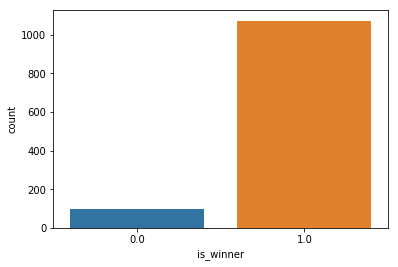

In [520]:
sns.countplot(x='is_winner', data = df_new)

In [521]:
#check number of null values in the dataset
df_new.isnull().sum()

winner_x                0
Actress                 0
movie_title_x           0
budget                  0
cast                    0
crew                    0
genres                  0
genres_new              0
keywords                0
movie_id                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
released_year           0
movie_title_y           0
year                    0
ceremony                0
award                   0
is_winner               0
winner_y                0
movieName               0
Nominis                 0
movie_title             0
dtype: int64

In [522]:
#Exploratory Data Analysis

# check the data types and select numeric variables
df_new.dtypes
df_new.drop(['genres_new'], axis=1)

,winner_x,Actress,movie_title_x,budget,cast,crew,genres,keywords,movie_id,original_language,...,released_year,movie_title_y,year,ceremony,award,is_winner,winner_y,movieName,Nominis,movie_title
0,0.0,0,0,32000000,"[{""cast_id"": 1, ""character"": ""Remy"", ""credit_i...","[{""credit_id"": ""52fe44a49251416c91017c3f"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[{""id"": 4565, ""name"": ""dystopia""}, {""id"": 1173...",0.0,en,...,2010,repo men,0.0,0.0,0,0.0,0.0,0,0,0
1,0.0,0,0,9000000,"[{""cast_id"": 9, ""character"": ""Logan"", ""credit_...","[{""credit_id"": ""52fe43ba9251416c7501bcf9"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 293, ""name"": ""female nudity""}, {""id"": ...",0.0,en,...,1976,logans run,0.0,0.0,0,0.0,0.0,0,0,0
2,0.0,0,0,70000000,"[{""cast_id"": 9, ""character"": ""Anthony 'Hub' Hu...","[{""credit_id"": ""52fe4540c3a36847f80c3af5"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""id"": 187, ""name"": ""islam""}, {""id"": 789, ""na...",0.0,en,...,1998,the siege,0.0,0.0,0,0.0,0.0,0,0,0
3,0.0,0,0,15000000,"[{""cast_id"": 1, ""character"": ""Ashley Grant"", ""...","[{""credit_id"": ""5685935e9251417e63004122"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",[],0.0,en,...,2000,whatever it takes,0.0,0.0,0,0.0,0.0,0,0,0
4,0.0,0,0,10000000,"[{""cast_id"": 1, ""character"": ""Mack"", ""credit_i...","[{""credit_id"": ""54d4d9029251413fd6014680"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 27, ""nam...","[{""id"": 187820, ""name"": ""duct tape gag""}, {""id...",0.0,en,...,2009,the devils tomb,0.0,0.0,0,0.0,0.0,0,0,0
5,0.0,0,0,15000000,"[{""cast_id"": 1, ""character"": ""Waxman"", ""credit...","[{""credit_id"": ""52fe448ac3a368484e0289e7"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",[],0.0,en,...,1996,silent trigger,0.0,0.0,0,0.0,0.0,0,0,0
6,0.0,0,0,100000000,"[{""cast_id"": 2, ""character"": ""Dr. Rick Marshal...","[{""credit_id"": ""52fe47649251416c75097bb5"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...","[{""id"": 4862, ""name"": ""alien life-form""}, {""id...",0.0,en,...,2009,land of the lost,0.0,0.0,0,0.0,0.0,0,0,0
7,0.0,0,0,0,[],"[{""credit_id"": ""55327ddac3a3682217002e7f"", ""de...","[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 187056, ""name"": ""woman director""}]",0.0,en,...,2015,antarctic edge 70 south,0.0,0.0,0,0.0,0.0,0,0,0
8,0.0,0,0,0,"[{""cast_id"": 1, ""character"": ""Hans Hubermann"",...","[{""credit_id"": ""53185c8f92514177bf000e45"", ""de...","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...",0.0,en,...,2013,the book thief,0.0,0.0,0,0.0,0.0,0,0,0
9,0.0,0,0,12000000,"[{""cast_id"": 7, ""character"": ""Jess"", ""credit_i...","[{""credit_id"": ""52fe4505c3a368484e043c73"", ""de...","[{""id"": 27, ""name"": ""Horror""}]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 1196, ""n...",0.0,en,...,2009,triangle,0.0,0.0,0,0.0,0.0,0,0,0


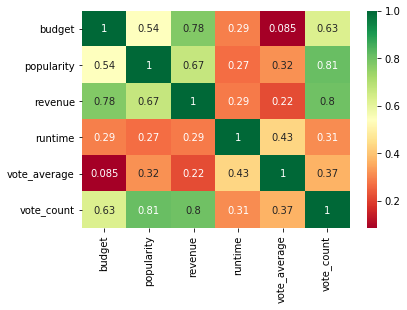

In [523]:
# correlation analysis
g = sns.heatmap(df_new[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(),cmap='RdYlGn',annot=True)


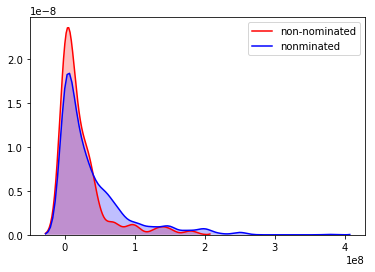

In [524]:
# Density Curve
# budget
budget0 = df_new[df_new['is_winner'] == 0]['budget']
budget1 = df_new[df_new['is_winner'] == 1]['budget']

g = sns.kdeplot(budget0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(budget1, legend = True, shade=True, color='b', label = 'nonminated')

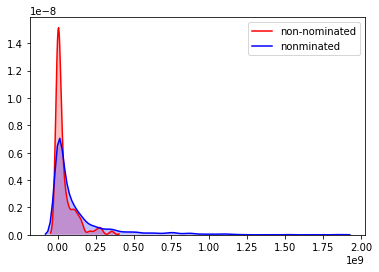

In [525]:
# revenue
# density curve
revenue0 = df_new[df_new['is_winner'] == 0]['revenue']
revenue1 = df_new[df_new['is_winner'] == 1]['revenue']

g = sns.kdeplot(revenue0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(revenue1, legend = True, shade=True, color='b', label = 'nonminated')

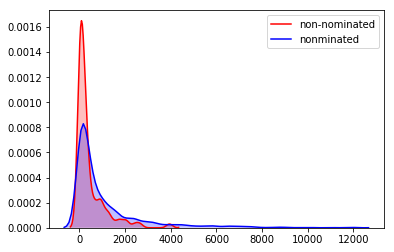

In [526]:
# vote count
vc0 = df_new[df_new['is_winner'] == 0]['vote_count']
vc1 = df_new[df_new['is_winner'] == 1]['vote_count']

g = sns.kdeplot(vc0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(vc1, legend = True, shade=True, color='b', label = 'nonminated')

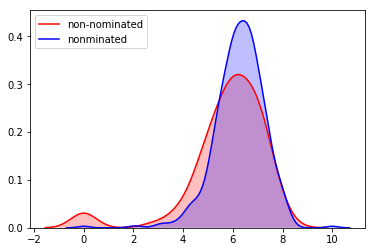

In [527]:
# vote average
va0 = df_new[df_new['is_winner'] == 0]['vote_average']
va1 = df_new[df_new['is_winner'] == 1]['vote_average']

g = sns.kdeplot(va0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(va1, legend = True, shade=True, color='b', label = 'nonminated')

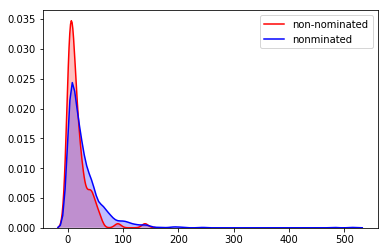

In [528]:
# popularity
popularity0 = df_new[df_new['is_winner'] == 0]['popularity']
popularity1 = df_new[df_new['is_winner'] == 1]['popularity']

g = sns.kdeplot(popularity0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(popularity1, legend = True, shade=True, color='b', label = 'nonminated')

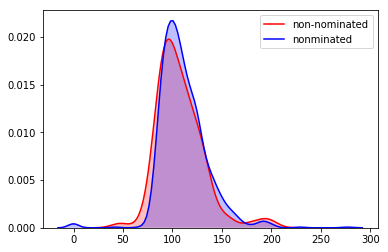

In [529]:
#runtime
runtime0 = df_new[df_new['is_winner'] == 0]['runtime']
runtime1 = df_new[df_new['is_winner'] == 1]['runtime']

g = sns.kdeplot(runtime0, legend = True, shade=True, color='r', label = 'non-nominated')
g = sns.kdeplot(runtime1, legend = True, shade=True, color='b', label = 'nonminated')

In [530]:
df_new = df_new[df_new.genres != 0]

In [531]:
#genres
#clean the data
genres_name0 = {}
genres_name1 = {}
genres_set = set()
for i in range(len(df_new)):
    try:
        genres = eval(df_new.loc[i,'genres'])
        #{'id': 35, 'name': 'Comedy'}
        for it in genres:
            #print(it)
            genres_set.add(it['name'])
            if df_new.loc[i,'is_winner'] == 0:
                if it['name'] not in genres_name0:
                    genres_name0[it['name']] = 1
                else:
                    genres_name0[it['name']] += 1
            if df_new.loc[i,'is_winner'] == 1:
                if it['name'] not in genres_name1:
                    genres_name1[it['name']] = 1
                else:
                    genres_name1[it['name']] += 1
    except KeyError as e:
        print(it)
        pass

genres_array0=[]
genres_array1=[]
for g in genres_set:
    if g in genres_name0:
        genres_array0.append(genres_name0[g])
    else:
        genres_array0.append(0)
    if g in genres_name1:
        genres_array1.append(genres_name1[g])
    else:
        genres_array1.append(0)


        
genres_all = []
genres_all.append(np.array(genres_array0)/sum(genres_array0))
genres_all.append(np.array(genres_array1)/sum(genres_array1))

{'id': 37, 'name': 'Western'}
{'id': 10749, 'name': 'Romance'}
{'id': 10749, 'name': 'Romance'}
{'id': 27, 'name': 'Horror'}
{'id': 27, 'name': 'Horror'}
{'id': 27, 'name': 'Horror'}
{'id': 27, 'name': 'Horror'}
{'id': 27, 'name': 'Horror'}


In [532]:
df_genres = pd.DataFrame(genres_all, columns=list(genres_set))
print(df_genres.head())

     Action  TV Movie       War   Western    Family  Animation    Comedy  \
0  0.116279  0.000000  0.007752  0.015504  0.019380   0.007752  0.127907   
1  0.092537  0.000373  0.010821  0.007090  0.040299   0.014179  0.147015   

    Fantasy     Music   Mystery     Crime   Romance  Thriller  Documentary  \
0  0.023256  0.015504  0.019380  0.058140  0.073643  0.139535     0.015504   
1  0.040672  0.015299  0.027612  0.058209  0.076119  0.096269     0.002612   

   Adventure    Horror     Drama   Foreign   History  Science Fiction  
0   0.069767  0.034884  0.170543  0.003876  0.011628         0.069767  
1   0.069776  0.044030  0.185821  0.001493  0.018284         0.051493  


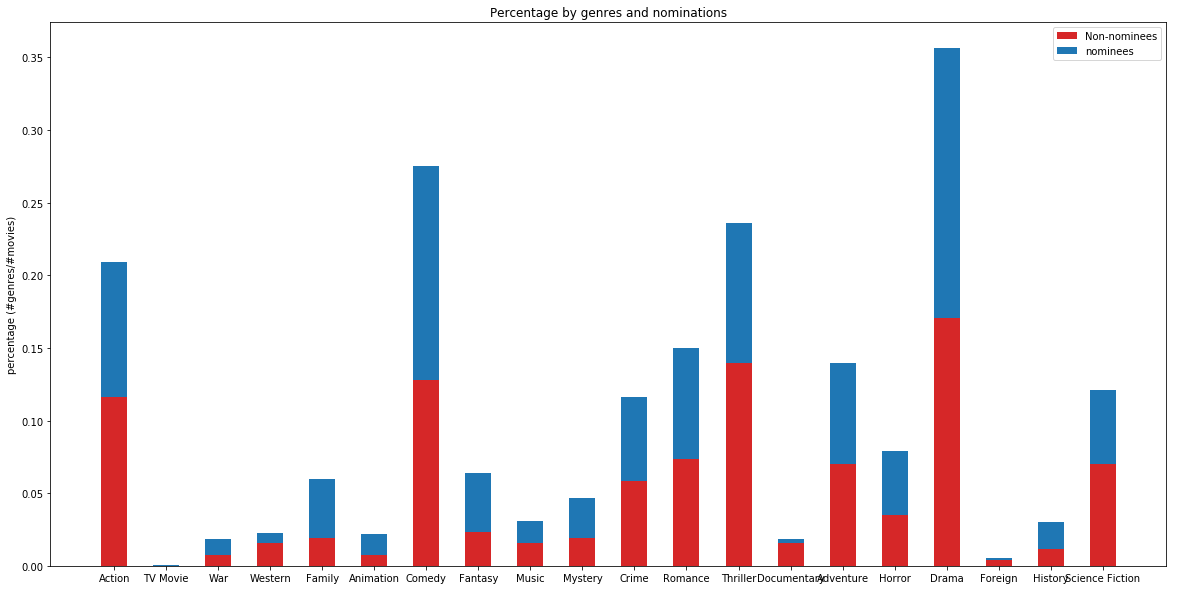

In [533]:
# draw stacked bar chart
N = len(df_genres.columns)
ind = np.arange(N)
width = 0.5

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, df_genres.loc[[0]].values[0], width, color='#d62728')
p2 = plt.bar(ind, df_genres.loc[[1]].values[0], width, bottom=df_genres.loc[[0]].values[0])

plt.ylabel('percentage (#genres/#movies)')
plt.title('Percentage by genres and nominations')
plt.xticks(ind,df_genres.columns)
plt.legend((p1[0],p2[0]),('Non-nominees','nominees'))

In [534]:
# Feature Engineering
# Since many columns such as “crew”, “cast” contain information in json format, we need to extract useful information from the columns and then perform one hot encoding.
# We will transform our dataset into a all numeric matrix so that we can feed the data into our machine learning model.
# To look at the structure of column (eg.”cast”), we can use: df.loc[0,’cast’]
import json
def feature_engineering(column_name, df, json_name):
    """
    Args:
        column_name: the column name in the dataframe that contains a json file that needs to conduct feature engineering on
        df: dataframe that perform feature engineering on
        json_name: name in the json file that we want to extract
    
    Returns: new dataframe after feature engineering
    """
    
    name = {}

    for item in df[column_name]:
        try:
            group = eval(item)
            for it in group:
                if it[json_name] not in name:
                    name[it[json_name]] = 1
                else:
                    name[it[json_name]] += 1
        except KeyError as e:
            print(it)
            pass
    
    final = {}
    index = 0
    for k,v in name.items():
        if v > 1:
            final[k] = index
            index += 1
    np_item = np.zeros((len(df),len(final)))
    item_dict = {}
    row = 0
    for item in df[column_name]:
        try:
            group = eval(item)
            for it in group:
                if it[json_name] in final:
                    index = final[it[json_name]]
                    np_item[row][index] = 1
            row += 1
        except KeyError as e:
            print(it)
            pass

    df_item = pd.DataFrame(np_item, columns = list(final.keys()))
    df_output = pd.concat([df,df_item],axis = 1)
    
    return df_output

In [535]:
df2 = feature_engineering("cast", df_new, "name")
df2 = df2.drop('cast', axis = 1) #drop the column after feature engineering
df2

,winner_x,Actress,movie_title_x,budget,crew,genres,genres_new,keywords,movie_id,original_language,...,Herman Hack,Chuck Hamilton,Mabel Smaney,Max Wagner,Edward Peil Sr.,Spring Byington,Russell Hicks,Edwin Maxwell,Wallis Clark,Erik Holland
0,0.0,0,0,32000000.0,"[{""credit_id"": ""52fe44a49251416c91017c3f"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",0,"[{""id"": 4565, ""name"": ""dystopia""}, {""id"": 1173...",0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0,9000000.0,"[{""credit_id"": ""52fe43ba9251416c7501bcf9"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",0,"[{""id"": 293, ""name"": ""female nudity""}, {""id"": ...",0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,0,70000000.0,"[{""credit_id"": ""52fe4540c3a36847f80c3af5"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",0,"[{""id"": 187, ""name"": ""islam""}, {""id"": 789, ""na...",0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0,15000000.0,"[{""credit_id"": ""5685935e9251417e63004122"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",0,[],0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0,10000000.0,"[{""credit_id"": ""54d4d9029251413fd6014680"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 27, ""nam...",0,"[{""id"": 187820, ""name"": ""duct tape gag""}, {""id...",0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0,0,15000000.0,"[{""credit_id"": ""52fe448ac3a368484e0289e7"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",0,[],0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0,0,100000000.0,"[{""credit_id"": ""52fe47649251416c75097bb5"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",0,"[{""id"": 4862, ""name"": ""alien life-form""}, {""id...",0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0,0,0.0,"[{""credit_id"": ""55327ddac3a3682217002e7f"", ""de...","[{""id"": 99, ""name"": ""Documentary""}]",0,"[{""id"": 187056, ""name"": ""woman director""}]",0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0,0,0.0,"[{""credit_id"": ""53185c8f92514177bf000e45"", ""de...","[{""id"": 18, ""name"": ""Drama""}]",0,"[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...",0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0,0,12000000.0,"[{""credit_id"": ""52fe4505c3a368484e043c73"", ""de...","[{""id"": 27, ""name"": ""Horror""}]",0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 1196, ""n...",0.0,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [536]:
# director
cast_name = {}

for item in df2['Actress']:
    if item not in cast_name:
        cast_name[item] = 1
    else:
        cast_name[item]+=1


# set the appear tims for actors
final_crew = {}
index = 0
for k,v in cast_name.items():
    if v > 0:
        final_crew[k] = index
        index += 1
# print(len(final_crew))

np_crew = np.zeros((len(df2), len(final_crew)))
row = 0
for item in df2['Actress']:
    if item not in final_crew:
        index = final_crew[item]
        np_crew[row][index] = 1
    else:
        cast_name[item]+=1
    row += 1

df_crew = pd.DataFrame(np_crew, columns = list(final_crew.keys()))
            
df3 = pd.concat([df2, df_crew], axis = 1)
# print(df.shape)

In [537]:
df_new = df_new[df_new.crew != 0]

In [538]:
# df_clean = df3
df3=df3.drop(['crew'],axis=1)
df4 = feature_engineering("genres", df3, "name")
df4 = df4.drop(['genres'], axis = 1)
#keywords
df5 = feature_engineering('keywords', df4, 'name')
df5 = df5.drop(['keywords'], axis = 1)
#production_companies
df6 = feature_engineering('production_companies',df5,'name')
df6 = df6.drop(['production_companies'],axis=1)
#production_countries
df7 = feature_engineering('production_countries',df6,'name')
df7 = df7.drop(['production_countries'],axis=1)
#spoken_languages
df8 = feature_engineering('spoken_languages',df7,'iso_639_1')
df8 = df8.drop(['spoken_languages'],axis=1)

# # drop the columns not used
# df8
#df_clean = df8.drop(["movie_title","original_title","overview","tagline",'title','original_language','status','release_date','movieName','filmInfo','award'],axis=1)

TypeError: eval() arg 1 must be a string, bytes or code object

In [35]:
list(df8)

['Actress',
 'budget',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'year',
 'ceremony',
 'award',
 'winner',
 'movieName',
 'Nominis',
 'Eddie Murphy',
 'Cameron Diaz',
 'Antonio Banderas',
 'Julie Andrews',
 'Jon Hamm',
 'John Cleese',
 'Craig Robinson',
 'Jane Lynch',
 'Lake Bell',
 'Mary Kay Place',
 'Kristen Schaal',
 'Cody Cameron',
 'Larry King',
 'Christopher Knights',
 'Conrad Vernon',
 'Chris Miller',
 'Ashley Boettcher',
 'Frank Welker',
 'Michael Sheen',
 'Sam Neill',
 'Ioan Gruffudd',
 'Keeley Hawes',
 'Mella Carron',
 'Tim Ajro',
 'Antony Gabriel',
 'Uma Thurman',
 'Luke Wilson',
 'Anna Faris',
 'Eddie Izzard',
 'Rainn Wilson',
 'Catherine Reitman',
 'Jack Nicholson',
 'Louise Fletcher',
 'Danny DeVito',
 'Brad Dourif',
 'Christopher Lloyd',
 'Vincent Schiavelli',
 'Aurore Clément',
 'Anjelica Huston',
 "Peter O'Toole",
 'Alec Guinness',
 'Ant

In [41]:
#'Actress', 'budget', 'original_language', 'popularity', 'release_date', 'revenue', 'vote_average', 'vote_count', 'year', 'winner', 'movieName', 
df_clean = df8.drop([
    'Actress',
    'original_language',
    'release_date',
    'movieName',
 'original_title',
    'status',
 'tagline',
 'title',
 'overview',
 'runtime',
 'ceremony',
 'award','Nominis'],axis=1)

df_clean.head()

,budget,popularity,revenue,vote_average,vote_count,year,winner,Eddie Murphy,Cameron Diaz,Antonio Banderas,...,la,cn,th,el,fi,sq,vi,sw,ro,no
0,165000000,44.041186,752600867,6.0,1959,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25000000,8.842722,6399,5.1,73,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,20.252143,60896147,4.8,442,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3000000,127.525581,108981275,8.2,2919,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15000000,41.286336,69995385,7.8,851,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(df_clean['winner'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
612    1.0
613    1.0
614    1.0
615    1.0
616    1.0
617    1.0
618    1.0
619    1.0
620    1.0
621    1.0
622    1.0
623    1.0
624    1.0
625    1.0
626    1.0
627    1.0
628    1.0
629    1.0
630    1.0
631    1.0
632    1.0
633    1.0
634    1.0
635    1.0
636    1.0
637    1.0
638    1.0
639    1.0
640    1.0
641    1.0
Name: winner, Length: 642, dtype: float64


In [43]:
# Model Training
# split
X = df_clean[df_clean.columns.difference(['winner'])]
print(list(df_clean))

#X = StandardScaler().fit_transform(X)
y = df_clean['winner']
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=1/7.0, random_state=0)
print(X_train)

['budget', 'popularity', 'revenue', 'vote_average', 'vote_count', 'year', 'winner', 'Eddie Murphy', 'Cameron Diaz', 'Antonio Banderas', 'Julie Andrews', 'Jon Hamm', 'John Cleese', 'Craig Robinson', 'Jane Lynch', 'Lake Bell', 'Mary Kay Place', 'Kristen Schaal', 'Cody Cameron', 'Larry King', 'Christopher Knights', 'Conrad Vernon', 'Chris Miller', 'Ashley Boettcher', 'Frank Welker', 'Michael Sheen', 'Sam Neill', 'Ioan Gruffudd', 'Keeley Hawes', 'Mella Carron', 'Tim Ajro', 'Antony Gabriel', 'Uma Thurman', 'Luke Wilson', 'Anna Faris', 'Eddie Izzard', 'Rainn Wilson', 'Catherine Reitman', 'Jack Nicholson', 'Louise Fletcher', 'Danny DeVito', 'Brad Dourif', 'Christopher Lloyd', 'Vincent Schiavelli', 'Aurore Clément', 'Anjelica Huston', "Peter O'Toole", 'Alec Guinness', 'Anthony Quinn', 'Omar Sharif', 'Robert Rietty', 'George Plimpton', 'John Robinson', 'Joseph Gordon-Levitt', 'Ben Kingsley', 'Ben Schwartz', 'James Badge Dale', 'Jason Blicker', 'Philippe Hartmann', 'Jason Deline', 'Chris Cavener

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# X_test = pca.transform(X_test)
# pca = PCA(n_components = 3)
# fit = pca.fit_transform(X)
# fit2 = pca.fit(X)
# print("Explained Variance: %s" % pca.explained_variance_ratio_) 
# print(fit)

In [46]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# For small datasets, ‘liblinear’ is a good choice
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
# Predict for One Observation
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test))
# print(y_test)
# df8['movie_title'][y_test.index]

[1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]


In [48]:
logisticRegr.score(X_train, y_train)

1.0

In [49]:
logisticRegr.score(X_test, y_test) # 0.8850574712643678

0.8695652173913043

In [50]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
sensitivity = tp/(tp+fn)
print(sensitivity) # 0.84375

0.7692307692307693


In [53]:
# Improvement: Cross Validation
# 3-fold Cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
sumAccuracy = []
for train,test in skf.split(X,y):
#     logisticRegr.fit(df_clean.iloc[train][], )
    df_train = df_clean.iloc[train]
    df_test = df_clean.iloc[test]
    train_X = df_train[df_clean.columns.difference(['winner'])]
    train_y = df_train['winner']
    test_X = df_test[df_clean.columns.difference(['winner'])]
    test_y = df_test['winner']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(avg) # 0.7803837953091683
#     print(df_clean.iloc[train,df_clean.columns.difference(['winner'])])

0.8597830845101034
